In [60]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [61]:
edgelist_df = pd.DataFrame({
    "source": ["France", "Russia", "North Macedonia", "Spain", "Georigia", "Belarus", "Malta", "Wales", "Kazachstan", "Irleand",
              "Ukraine", "The netherlands", "Armenia", "Portugal", "Italy", "Albania", "Serbia", "Australia"],
    "target": ["Poland", "Poland","Poland","Poland","Poland","Poland","Poland","Poland","Poland","Poland", "Poland", "Poland",
               "Poland","Poland","Poland","Poland","Poland","Poland"],
    "weight": [10, 1, 7, 12, 4, 10, 10, 6, 12, 4, 8, 8, 0, 5, 3 ,2, 10, 0 ]
})
edgelist_df = edgelist_df.sort_values(by='weight', ascending=False)

edgelist_df

,source,target,weight
3,Spain,Poland,12
8,Kazachstan,Poland,12
0,France,Poland,10
16,Serbia,Poland,10
5,Belarus,Poland,10
6,Malta,Poland,10
11,The netherlands,Poland,8
10,Ukraine,Poland,8
2,North Macedonia,Poland,7
7,Wales,Poland,6


In [62]:
graph = nx.from_pandas_edgelist(edgelist_df, edge_attr=True)

In [63]:
graph.edges(data=True)

EdgeDataView([('Spain', 'Poland', {'weight': 12}), ('Poland', 'Kazachstan', {'weight': 12}), ('Poland', 'France', {'weight': 10}), ('Poland', 'Serbia', {'weight': 10}), ('Poland', 'Belarus', {'weight': 10}), ('Poland', 'Malta', {'weight': 10}), ('Poland', 'The netherlands', {'weight': 8}), ('Poland', 'Ukraine', {'weight': 8}), ('Poland', 'North Macedonia', {'weight': 7}), ('Poland', 'Wales', {'weight': 6}), ('Poland', 'Portugal', {'weight': 5}), ('Poland', 'Irleand', {'weight': 4}), ('Poland', 'Georigia', {'weight': 4}), ('Poland', 'Italy', {'weight': 3}), ('Poland', 'Albania', {'weight': 2}), ('Poland', 'Russia', {'weight': 1}), ('Poland', 'Armenia', {'weight': 0}), ('Poland', 'Australia', {'weight': 0})])

In [64]:
pos = {country: (np.cos(angle), np.sin(angle)) for country, angle in 
       zip(edgelist_df['source'], np.linspace(0, 2 * np.pi, len(edgelist_df['source'])+1))}
pos['Poland'] = (0, 0)

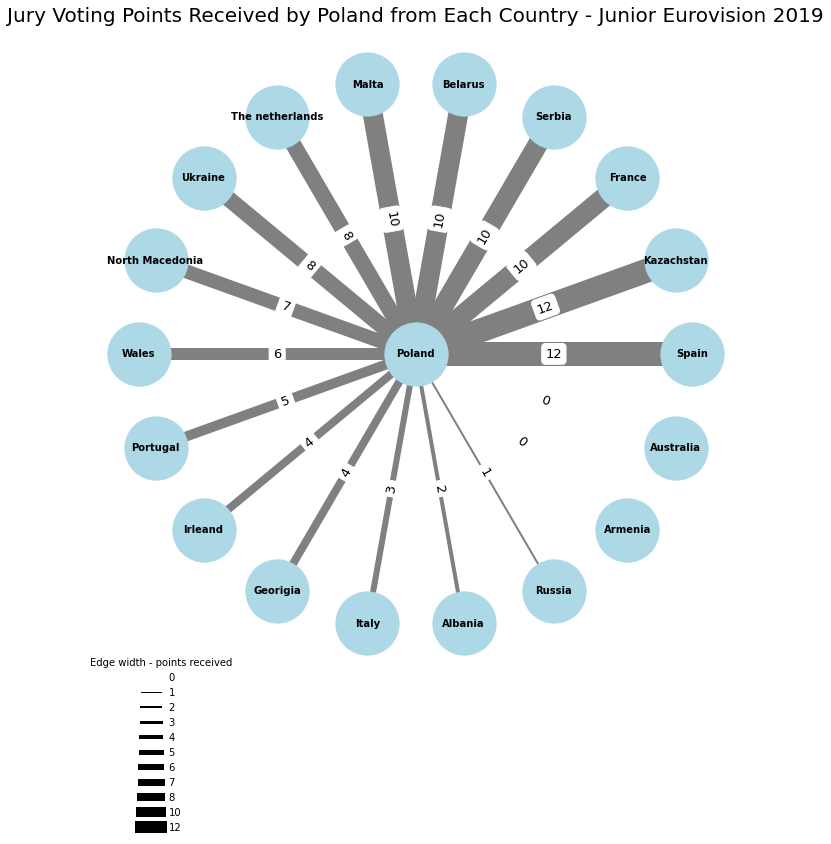

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

ax.set_title('Jury Voting Points Received by Poland from Each Country - Junior Eurovision 2019', fontsize=20)

nx.draw(graph, pos, with_labels=True, node_size=4000, node_color="lightblue", font_size=10, font_weight='bold',
       width= [e[2]["weight"]*2  for e in graph.edges(data=True)],
       edge_color="gray", 
       ax=ax)

edge_weights = nx.get_edge_attributes(graph, 'weight')

# Rysowanie etykiet wag krawędzi
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_weights, font_size=13)



edge_sizes = [e[2]["weight"] for e in graph.edges(data=True)]
ax.legend(
    handles=[mpl.lines.Line2D([], [], color="k", linewidth=e) for e in np.unique(edge_sizes)],
    labels=list(np.unique(edge_sizes)),
    loc = "center left", 
    bbox_to_anchor=(0, -0.1),
    frameon=False,
    title="Edge width - points received"
)

plt.savefig("HW6.png", bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>